In [1]:
# Import necessary libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import random
import array
import statistics 
import statsmodels.api as sm
# Mann Kendall Library
import pymannkendall as mk

In [2]:
import pathlib
#from pathlib import path

#this line takes care of the rpy package later on, and the "unable to initalize the JIT fatal error" 
import os

os.environ['R_HOME'] = r"C:\Users\carol\miniforge3\envs\pyro_env\Lib\R"


In [3]:
# rpy2 for accessing R 
r_files = ['.RData', '.RHistory', '.RProfile']
for rf in r_files:
    p = pathlib.Path.cwd() / rf
    try:
        p.rename(p.with_suffix('.ignore'))
    except FileNotFoundError:
        pass

import rpy2

for rf in r_files:
    p = pathlib.Path.cwd() / rf
    p = p.with_suffix('.ignore')
    try:
        p.rename(p.with_suffix(''))
    except FileNotFoundError:
        pass

In [4]:
import lmoments3

In [5]:
#this is the workaround to stop the memory error 

r_files = ['.RData', '.RHistory', '.RProfile']
for rf in r_files:
    p = pathlib.Path.cwd() / rf
    try:
        p.rename(p.with_suffix('.ignore'))
    except FileNotFoundError:
        pass
import rpy2
from rpy2 import robjects
for rf in r_files:
    p = pathlib.Path.cwd() / rf
    p = p.with_suffix('.ignore')
    try:
        p.rename(p.with_suffix(''))
    except FileNotFoundError:
        pass

In [6]:
import climextremes

R[write to console]: Loading required package: usethis



Current version: 0.3.1 does not match requested version: 0.3.1rc1. Attempting installation of R climextRemes package (this may take a few minutes) ...


R[write to console]: WARNING: Rtools is required to build R packages, but is not currently installed.

Please download and install Rtools 4.0 from https://cran.r-project.org/bin/windows/Rtools/.

R[write to console]: Error in parse_deps(paste(spec, collapse = ", ")) : 
  Invalid comparison operator in dependency: p(0.3.1rc1)

R[write to console]: WARNING: Rtools is required to build R packages, but is not currently installed.

Please download and install Rtools 4.0 from https://cran.r-project.org/bin/windows/Rtools/.

R[write to console]: Warning:
R[write to console]:  unable to access index for repository https://cran.cnr.berkeley.edu/src/contrib:
  cannot open URL 'https://cran.cnr.berkeley.edu/src/contrib/PACKAGES'

R[write to console]: Error in download_version_url(package, version, repos, type) : 
  couldn't find package 'climextRemes'



Installation of R climextRemes version: 0.3.1rc1 failed (likely because the version is not on the CRAN R package archive).
Falling back to installed version.


In [7]:
%load_ext rpy2.ipython

C:\Users\carol\miniforge3\envs\pyro_env\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [8]:
#### ENV SETUP COMPLETE ####

In [9]:
df=pd.read_csv('cp_warm_season_3vars.csv')

In [10]:
df["AMWSR"]=df["Annual Warm Season Maximum Hourly Rainfall(inches/hr)"]
df["Years"]=df['year']
df['CDD']=df['Warm Season Cooling Degree Days (C)']
df['temp']=df['Warm Season Average Temperature (C)']
df

,Unnamed: 0,year,Warm Season Average Temperature (C),Warm Season Cooling Degree Days (C),Annual Warm Season Maximum Hourly Rainfall(inches/hr),AMWSR,Years,CDD,temp
0,0,1948,37.845715,605.555556,0.80,0.80,1948,605.555556,37.845715
1,1,1949,39.163650,743.333333,1.10,1.10,1949,743.333333,39.163650
2,2,1950,37.193542,492.777778,1.04,1.04,1950,492.777778,37.193542
3,3,1951,38.072163,603.888889,0.82,0.82,1951,603.888889,38.072163
4,4,1952,38.410328,707.777778,0.62,0.62,1952,707.777778,38.410328
...,...,...,...,...,...,...,...,...,...
71,71,2019,38.804348,698.333333,1.15,1.15,2019,698.333333,38.804348
72,72,2020,38.650368,737.222222,1.52,1.52,2020,737.222222,38.650368
73,73,2021,39.157610,731.666667,3.47,3.47,2021,731.666667,39.157610
74,74,2022,38.952293,759.444444,1.02,1.02,2022,759.444444,38.952293


In [11]:
df=df.drop(columns=['Unnamed: 0'])

In [13]:
%%R -i df
#calculate lowess thru R
Years_historical = df$Years #1948-2023
p = df$AMWSR
cdd = df$CDD
temp = df$temp

lp = lowess(Years_historical,p)
lc = lowess(Years_historical,cdd)
lt = lowess(Years_historical,temp)

#6/25/2024 addition to show the sub-trend
alpha_proxy = lowess(p)
dlines = lowess(cdd,alpha_proxy$y)

In [14]:
from collections import OrderedDict

In [15]:
#pull out lowess 
lp = %R lp
lc = %R lc
lt = %R lt

In [16]:
lc = pd.DataFrame(lc)
lp = pd.DataFrame(lp)
lt = pd.DataFrame(lt)

In [17]:
alpha_proxy = %R alpha_proxy
dlines = %R dlines

In [18]:
ap = pd.DataFrame(alpha_proxy)
dl = pd.DataFrame(dlines)

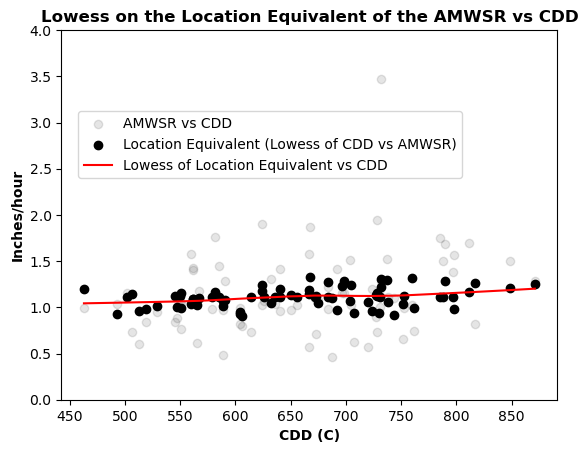

In [22]:
#plot for direct response to reviewer 

plt.scatter(df['CDD'],df["AMWSR"],color='k',alpha=0.1)
plt.scatter(df['CDD'],ap['y'],color='k')
plt.plot(dl['x'],dl['y'],'r')
#plt.plot(x_num,lp['y'],'r',linewidth =2)
#p = sb.histplot(AMR, kde=True)
plt.title('Lowess on the Location Equivalent of the AMWSR vs CDD',weight='bold')
plt.ylabel('Inches/hour',weight='bold')
plt.xlabel('CDD (C)',weight='bold')
plt.ylim([0,4])

plt.legend(['AMWSR vs CDD','Location Equivalent (Lowess of CDD vs AMWSR)','Lowess of Location Equivalent vs CDD'],loc='upper left', bbox_to_anchor=(0.02,0.8))

#plt.setp(ax.get_xticklabels(), fontsize=10,weight='bold')
#plt.setp(ax.get_yticklabels(), fontsize=10,weight='bold')

In [24]:
#prepare mk slopes 

kk=mk.sens_slope(df['AMWSR'])
sl=round(kk.slope,4)
intc=round(kk.intercept,3)

ckk=mk.sens_slope(df['CDD'])
csl=round(ckk.slope,4)
cintc=round(ckk.intercept,3)

tkk=mk.sens_slope(df['temp'])
tsl=round(tkk.slope,4)
tintc=round(tkk.intercept,3)

In [25]:
print(tsl,csl,sl)
#calculate average of each first 
sat=sl/(df['AMWSR'][0])
sct=csl/(df['CDD'][0])
spt=tsl/(df['temp'][0])
print('temp:',spt*100,'cdd:',sct*100,'precip:',sat*100)

0.0108 1.3186 0.0048
temp: 0.02853691626647826 cdd: 0.21775045871559634 precip: 0.6


cdd fit [    1.17597782 -1675.3352548 ]  
1.176 x - 1675
precip fit [  0.00698346 -12.7190782 ]  
0.006983 x - 12.72


C:\Users\carol\AppData\Local\Temp\ipykernel_12568\3001945534.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax2.plot(x_num,lp['y'],'r',linewidth =2,color=color)


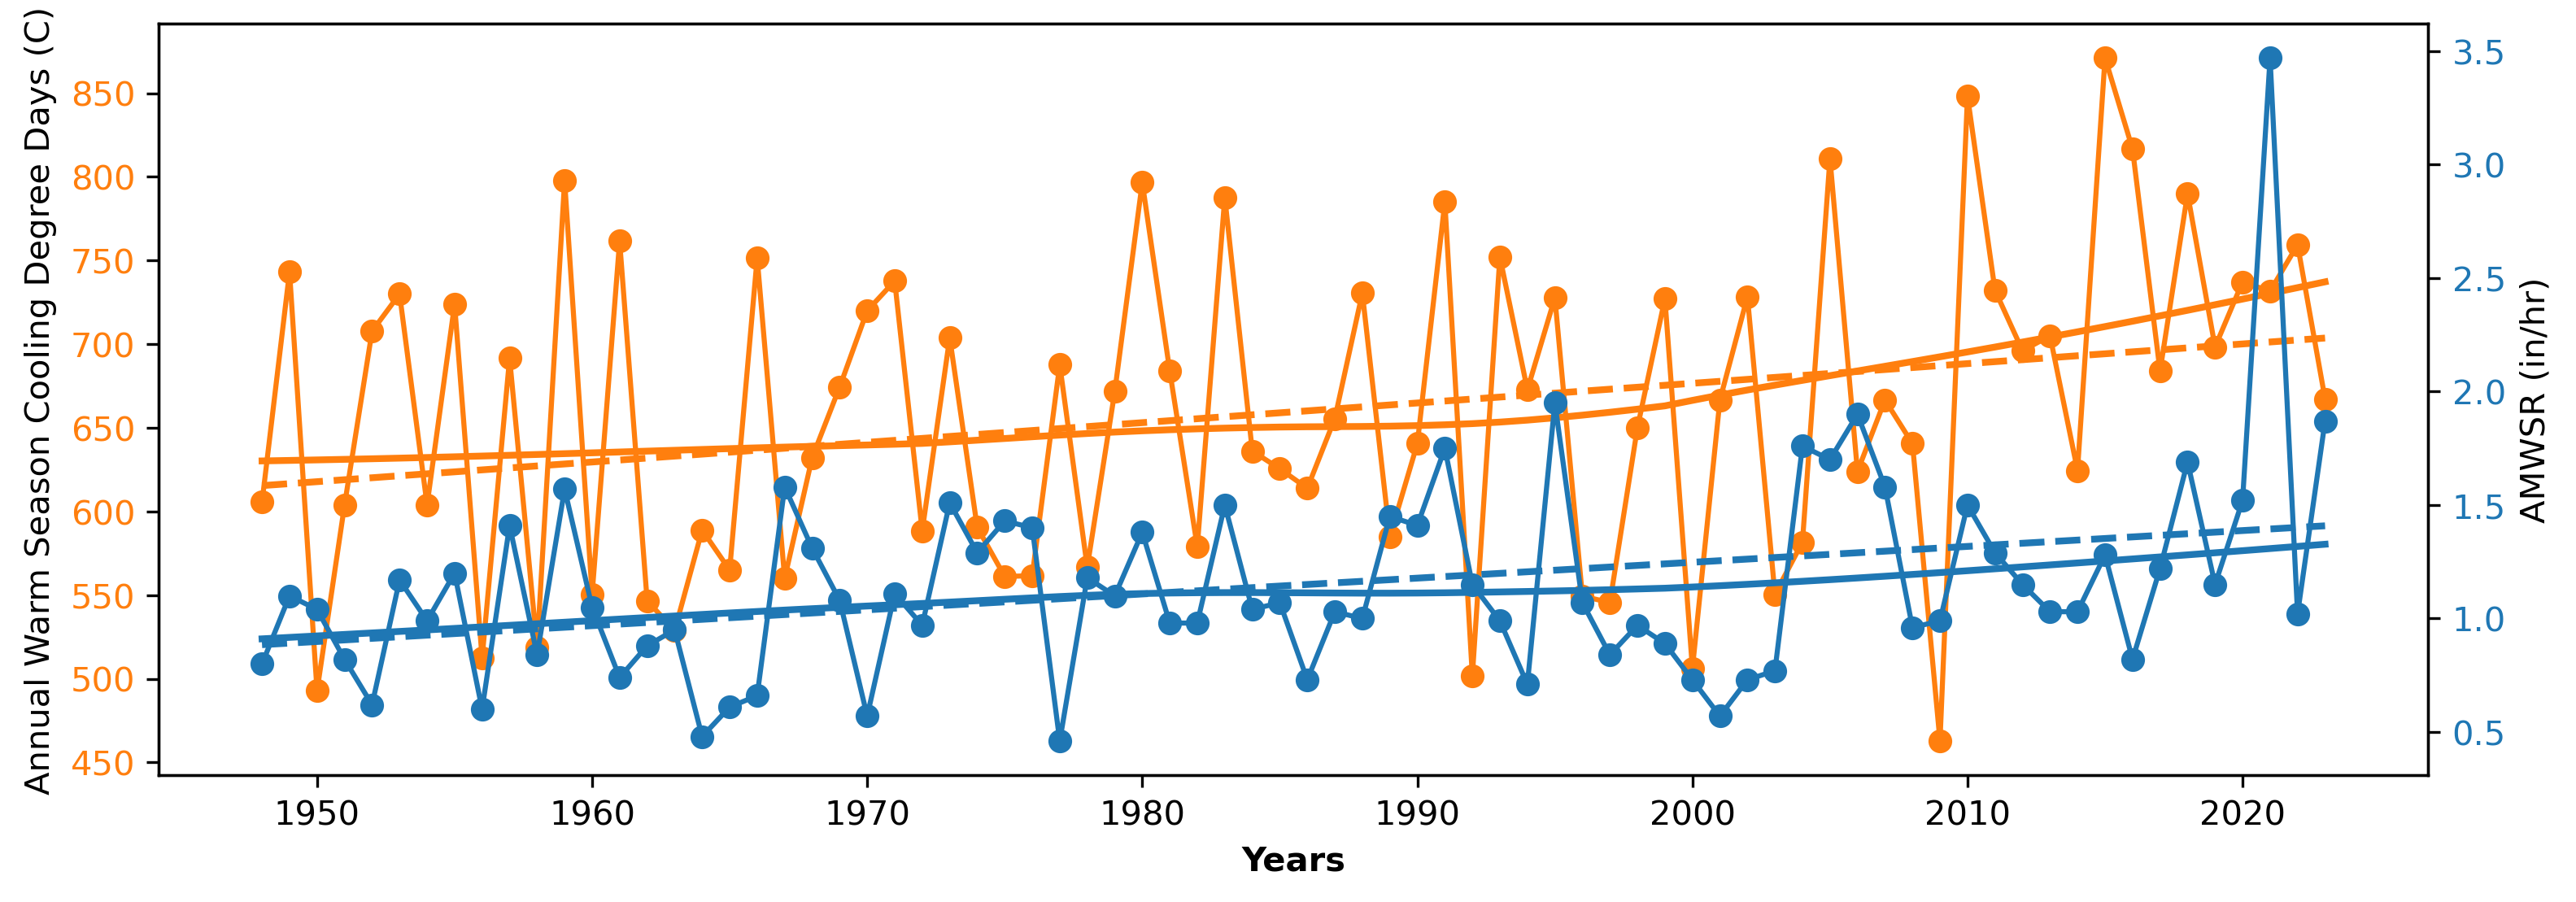

In [55]:
#double stacked plot 

fig, ax1 = plt.subplots(1,figsize=(12,4), dpi=300)

#CDD
color = 'tab:orange'
#add best fit line 
x_num = df["Years"]
vec=df['CDD']
trend = np.polyfit(x_num, vec, 1)
fit = np.poly1d(trend)
print('cdd fit',trend,fit)
cdd_sl=fit[1]
x_fit = np.linspace(x_num.min(), x_num.max())
ax1.plot(x_fit, fit(x_fit), "--", linewidth=2,color=color)
ax1.plot(x_num,vec,color=color)
ax1.scatter(x_num,vec,color=color)
ax1.plot(x_num,lc['y'],color=color,linewidth =2)
#p = sb.histplot(AMR, kde=True)
plt.title('')
ax1.set(ylabel='Annual Warm Season Cooling Degree Days (C)')
plt.xlabel('Years',weight='bold')
ax1.tick_params(axis='y', labelcolor=color)

# lab=('Rainfall: MK sens slope: '+str(sl)+' Intercept: '+str(intc))
# ax1.text(1955,850,lab)
# clab=('CDD: MK sens slope: '+str(csl)+' Intercept: '+str(cintc))
# ax1.text(1955,820,clab)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

# precip
color = 'tab:blue'
#add best fit line 
x_num = df["Years"]
vec=df['AMWSR']
trend = np.polyfit(x_num, vec, 1)
fit = np.poly1d(trend)
print('precip fit',trend,fit)
x_fit = np.linspace(x_num.min(), x_num.max())
precip_sl=fit[1]
ax2.plot(x_fit, fit(x_fit), "--", linewidth=2,color=color)
ax2.plot(x_num,vec,color=color)
ax2.scatter(x_num,vec,color=color)
ax2.plot(x_num,lp['y'],'r',linewidth =2,color=color)
#p = sb.histplot(AMR, kde=True)
#plt.title('Linear fit and Lowess for Rainfall and Covariates',weight='bold')
ax2.set(ylabel='AMWSR (in/hr)')
plt.xlabel('Years',weight='bold')
ax2.tick_params(axis='y', labelcolor=color)

plt.show()


temp fit [ 0.01002506 18.40740897]  
0.01003 x + 18.41
precip fit [  0.00698346 -12.7190782 ]  
0.006983 x - 12.72


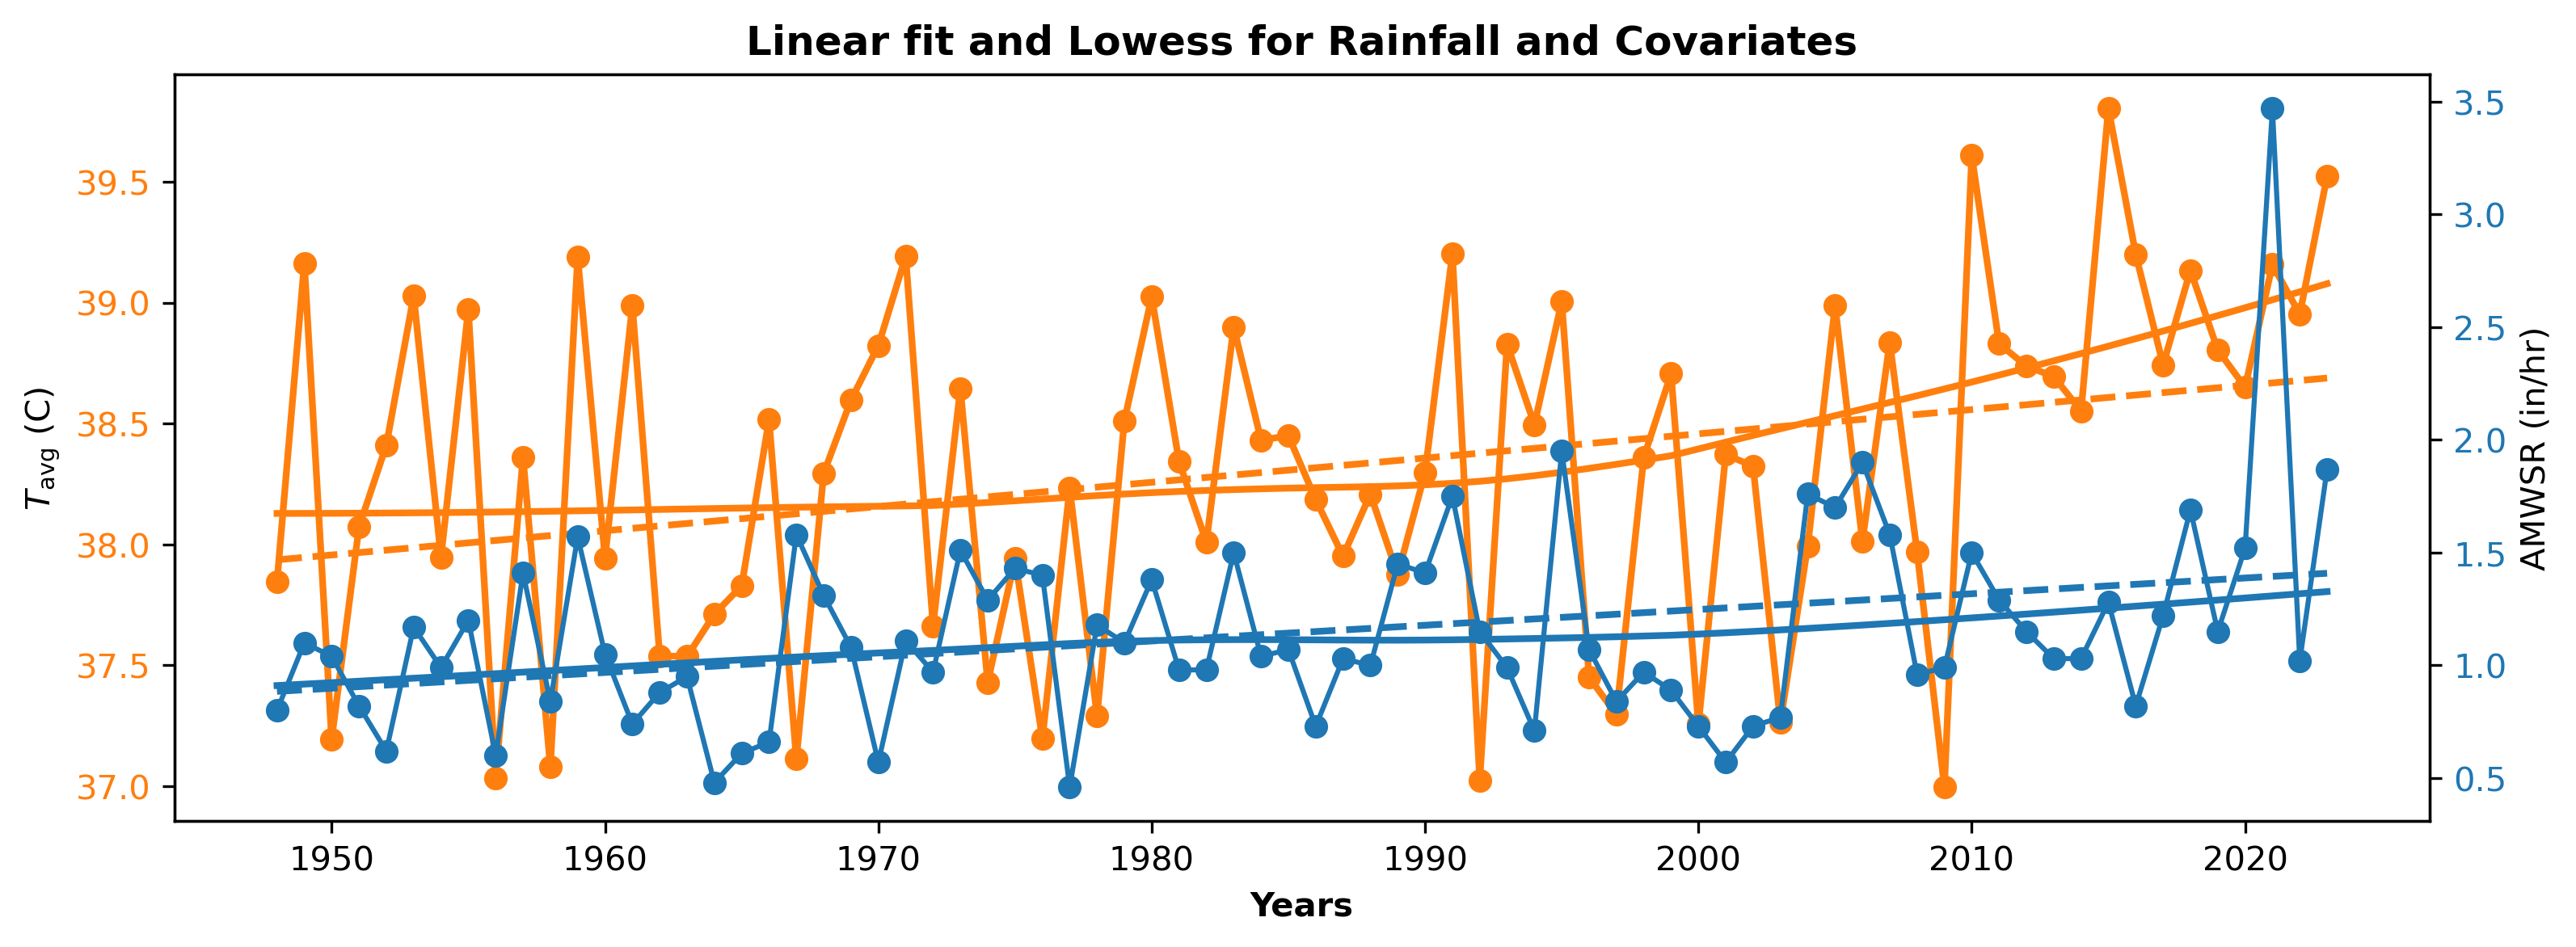

In [61]:
#TEMP ONLY
fig, ax1 = plt.subplots(1,figsize=(12,4), dpi=300)
trend=0
color = 'tab:orange'
#add best fit line 
#x_num = np.arange(1,77,1)
x_num = df["Years"]
vec=df['temp']
trend = np.polyfit(x_num, vec, 1)
fit = np.poly1d(trend)
print('temp fit',trend,fit)
cdd_sl=fit[1]
x_fit = np.linspace(x_num.min(), x_num.max())
ax1.plot(x_fit, fit(x_fit), "--", linewidth=2,color=color)
ax1.plot(x_num,lt['y'],color=color,linewidth =2)
ax1.plot(x_num,vec,color=color)
ax1.scatter(x_num,vec,color=color)
ax1.plot(x_num,vec,color=color,linewidth =2)
#p = sb.histplot(AMR, kde=True)
plt.title('')
ax1.set(ylabel=r'$T_{\mathrm{avg}}$ (C)')
plt.xlabel('Years',weight='bold')
ax1.tick_params(axis='y', labelcolor=color)

# lab=('Rainfall: MK sens slope: '+str(sl)+' Intercept: '+str(intc))
# ax1.text(1955,850,lab)
# clab=('CDD: MK sens slope: '+str(csl)+' Intercept: '+str(cintc))
# ax1.text(1955,820,clab)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

# precip
color = 'tab:blue'
#add best fit line 
#x_num = np.arange(1,77,1)
x_num = df["Years"]
vec=df['AMWSR']
trend = np.polyfit(x_num, vec, 1)
fit = np.poly1d(trend)
print('precip fit',trend,fit)
x_fit = np.linspace(x_num.min(), x_num.max())
precip_sl=fit[1]
ax2.plot(x_fit, fit(x_fit), "--", linewidth=2,color=color)
ax2.plot(x_num,vec,color=color)
ax2.scatter(x_num,vec,color=color)
ax2.plot(x_num,lp['y'],linewidth =2,color=color)
#p = sb.histplot(AMR, kde=True)
plt.title('Linear fit and Lowess for Rainfall and Covariates',weight='bold')
ax2.set(ylabel='AMWSR (in/hr)')
plt.xlabel('Years',weight='bold')
ax2.tick_params(axis='y', labelcolor=color)

plt.show()


In [31]:
#calculate the percent slope change for the historical period 
w=30
cum = df["temp"].iloc[:].rolling(window=w).mean()
lcum =df['CDD'].iloc[:].rolling(window=w).mean()
#position 10 is 2035
#hmt=(um[40]-um[10])/um[10]
#lmt=(lum[40]-lum[10])/lum[10]
hmc=(cum[75]-cum[30])/cum[30]
lmc=(lcum[75]-lcum[30])/lcum[30]
#position 40 then would be 75
#um[10:-10]

print(hmc*100,lmc*100)


1.1188804471906675 7.72941210863273


In [32]:
cum[-20:]

56    38.147345
57    38.182268
58    38.209492
59    38.229621
60    38.252266
61    38.201743
62    38.221217
63    38.237471
64    38.261777
65    38.254933
66    38.258959
67    38.304098
68    38.337914
69    38.364283
70    38.395131
71    38.426129
72    38.437904
73    38.436395
74    38.500656
75    38.523792
Name: temp, dtype: float64

In [33]:
#cdd slope
#change in lowess 
cddsl2= 0.003383/0.8842
tempsl2=0.05246/0.9027
print((cddsl2),tempsl2)

0.0038260574530649175 0.0581145452531295


cdd fit [  1.17597782 614.29356725]  
1.176 x + 614.3
precip fit [0.00698346 0.87771579]  
0.006983 x + 0.8777


C:\Users\carol\AppData\Local\Temp\ipykernel_12568\2115306108.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax2.plot(x_num,lp['y'],'r',linewidth =2,color=color)


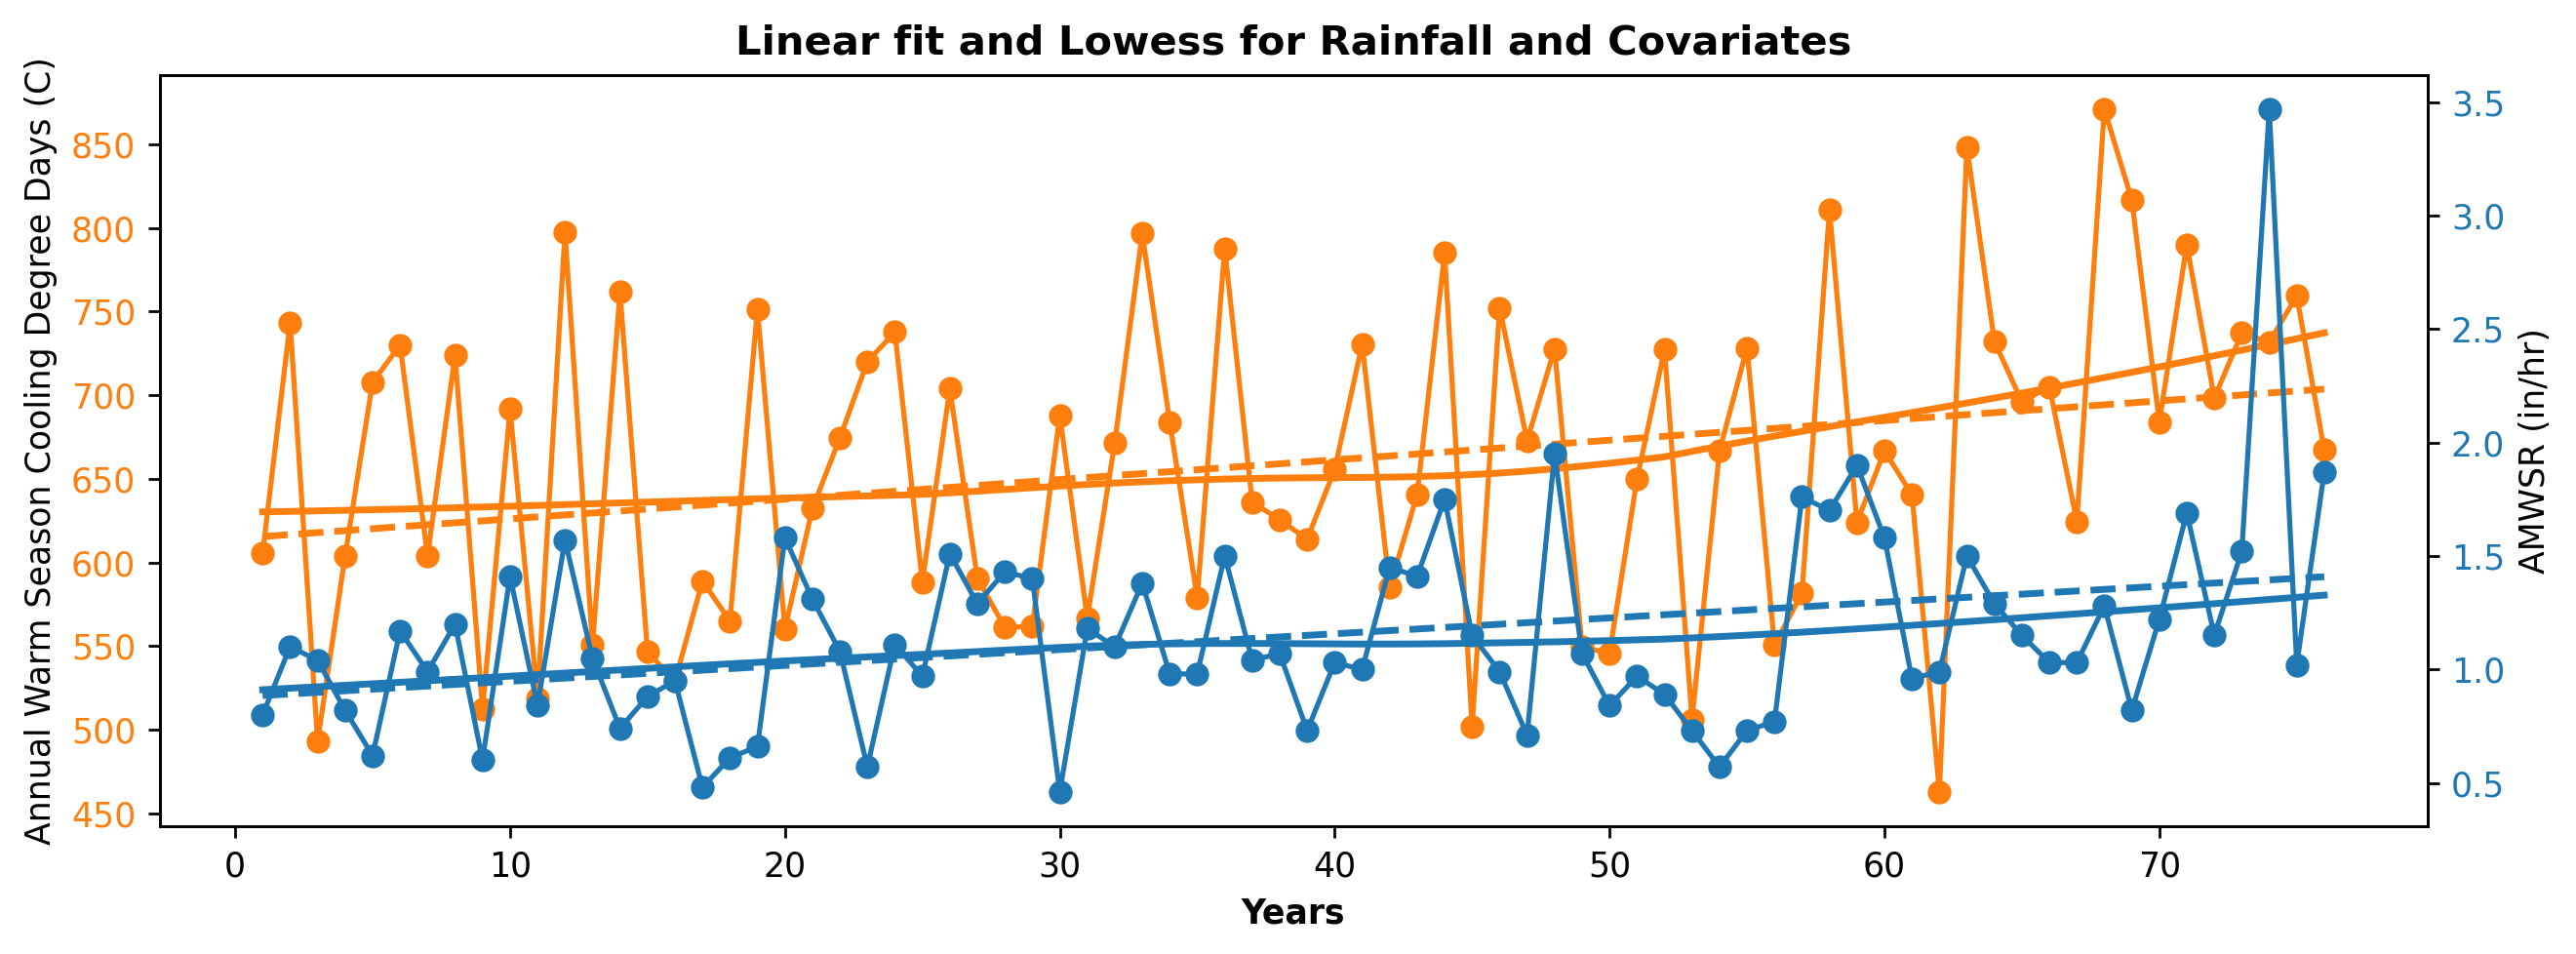

In [34]:
#CDD ONLY

fig, ax1 = plt.subplots(1,figsize=(12,4), dpi=250)

#CDD
color = 'tab:orange'
#add best fit line 
x_num = np.arange(1,77,1)
vec=df['CDD']
trend = np.polyfit(x_num, vec, 1)
fit = np.poly1d(trend)
print('cdd fit',trend,fit)
cdd_sl=fit[1]
x_fit = np.linspace(x_num.min(), x_num.max())
ax1.plot(x_fit, fit(x_fit), "--", linewidth=2,color=color)
ax1.plot(x_num,vec,color=color)
ax1.scatter(x_num,vec,color=color)
ax1.plot(x_num,lc['y'],color=color,linewidth =2)
#p = sb.histplot(AMR, kde=True)
plt.title('')
ax1.set(ylabel='Annual Warm Season Cooling Degree Days (C)')
plt.xlabel('Years',weight='bold')
ax1.tick_params(axis='y', labelcolor=color)

# lab=('Rainfall: MK sens slope: '+str(sl)+' Intercept: '+str(intc))
# ax1.text(1955,850,lab)
# clab=('CDD: MK sens slope: '+str(csl)+' Intercept: '+str(cintc))
# ax1.text(1955,820,clab)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

# precip
color = 'tab:blue'
#add best fit line 
x_num = np.arange(1,77,1)
vec=df['AMWSR']
trend = np.polyfit(x_num, vec, 1)
fit = np.poly1d(trend)
print('precip fit',trend,fit)
x_fit = np.linspace(x_num.min(), x_num.max())
precip_sl=fit[1]
ax2.plot(x_fit, fit(x_fit), "--", linewidth=2,color=color)
ax2.plot(x_num,vec,color=color)
ax2.scatter(x_num,vec,color=color)
ax2.plot(x_num,lp['y'],'r',linewidth =2,color=color)
#p = sb.histplot(AMR, kde=True)
plt.title('Linear fit and Lowess for Rainfall and Covariates',weight='bold')
ax2.set(ylabel='AMWSR (in/hr)')
plt.xlabel('Years',weight='bold')
ax2.tick_params(axis='y', labelcolor=color)

plt.show()


precip fit [0.0046481  0.92841715]  
0.004648 x + 0.9284


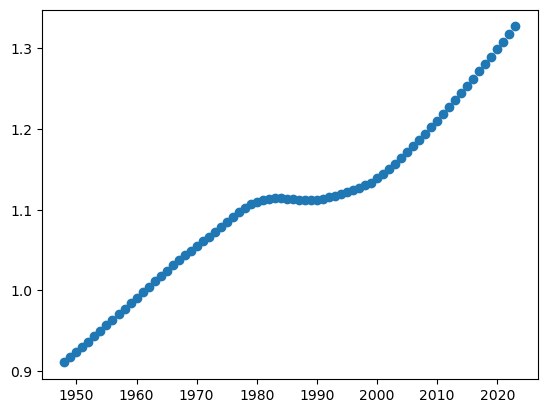

In [40]:
#time vs lowess p 
x_num = np.arange(1,77,1)
vec=lp['y']
trend = np.polyfit(x_num, vec, 1)
fit = np.poly1d(trend)
print('precip fit',trend,fit)
plt.scatter(lp['x'],lp['y'])